In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('bank_transactions.csv')
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [6]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d-%m-%Y')

In [7]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [8]:
data.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                72
CustGender                 11
CustLocation                1
CustAccountBalance         27
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [11]:
numeric_features = data[['CustAccountBalance', 'TransactionAmount (INR)']]
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

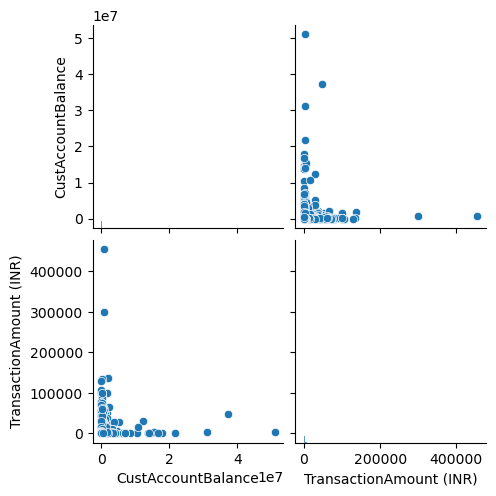

CPU times: total: 6.86 s
Wall time: 24.7 s


In [17]:
# %%time
sns.pairplot(data[['CustAccountBalance', 'TransactionAmount (INR)']])
plt.show()

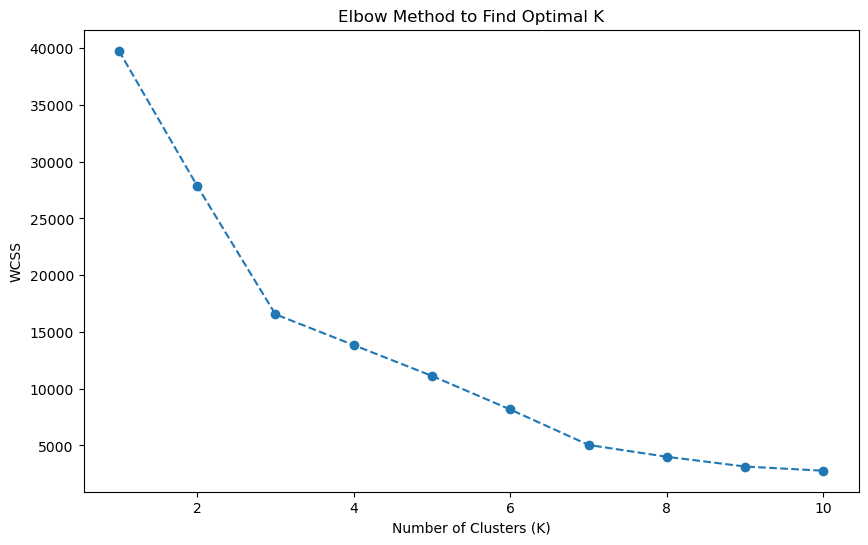

In [18]:
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [21]:
data['Cluster'].value_counts()

Cluster
0    19724
1      148
2       17
Name: count, dtype: int64

In [22]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Cluster
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0,0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,0
...,...,...,...,...,...,...,...,...,...,...
19995,T19996,C2130963,09-08-1989,M,MUMBAI,9961.78,2016-09-23,115919,47.0,0
19996,T19997,C1214583,02-01-1987,M,KOLKATA,7120.57,2016-09-23,115831,300.0,0
19997,T19998,C4739783,11-02-1970,M,MUMBAI,118130.78,2016-09-23,193238,3400.0,0
19998,T19999,C4532552,21-02-1993,M,DELHI,13226.06,2016-09-23,195759,500.0,0


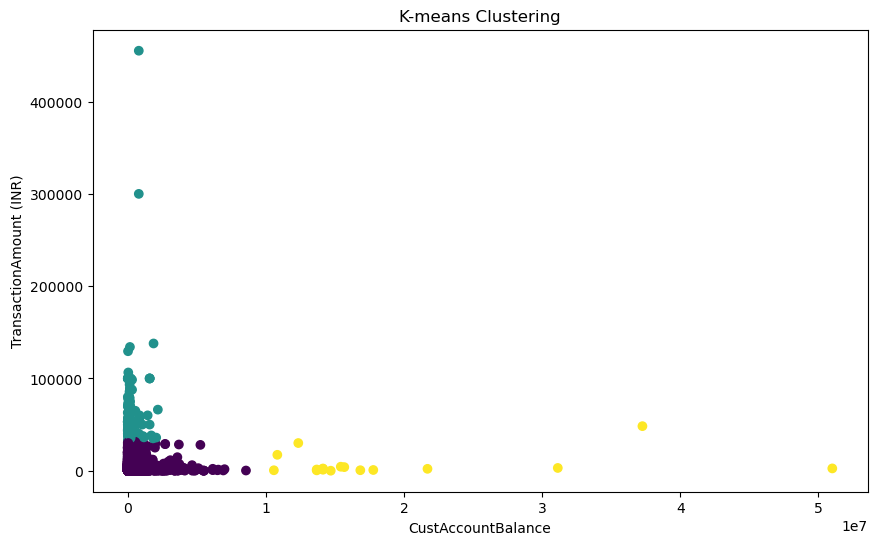

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('K-means Clustering')
plt.show()